
## Mulitple Linear Regression
### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Step 1: Data Loading and Understanding

In [2]:
bike_df = pd.read_csv('day.csv')
bike_df.head(3).append(bike_df.tail(3))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [3]:
bike_df.shape #checking the size of the data

(730, 16)

### Dataset has 730 rows and 16 columns

In [4]:
bike_df.info() #checking out for detailed info about the dataset
#Checking for count and the type of data present in the given dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike_df.size #describes the total size of the dataset

11680

## Step 2: Pre-processing

### (i) Drop columns that are not useful for data analysis
- instant:as it is the record index
- dteday: as the features of date are alreeady there like yr month and weekday
- casual and registered as the are in cnt, because cnt is sum of both the values

In [7]:
bike_df.isnull().sum() #checking for missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
bike_df.drop(['instant'],axis=1,inplace=True)
#dropping instant column as it is merely a index column which has no significance for our target

In [9]:
bike_df.drop(['dteday'],axis=1,inplace=True)
#dteday is not useful as month and weekday are covering it

bike_df.drop(['casual'],axis=1,inplace=True)
bike_df.drop(['registered'],axis=1,inplace=True)
#Removing casual and registered as cnt is sum of these

bike_df.drop(['holiday'],axis=1,inplace=True)
#Removing holiday as it can be inferred from workingday and weekdays column

 Inspecting data after dropping 

In [10]:
bike_df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### (iii) Mapping all non-binary and binary categorical columns to more meaningful values

In [11]:
#changing categorical data which were primarily numeric to more meaningful one
bike_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_df.mnth = bike_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_df.weekday = bike_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

bike_df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   weekday     730 non-null    object 
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 62.9+ KB


In [13]:
bike_df.nunique() #gives info about unique values present in data

season          4
yr              2
mnth           12
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

### (ii) Handling outliers

In [14]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

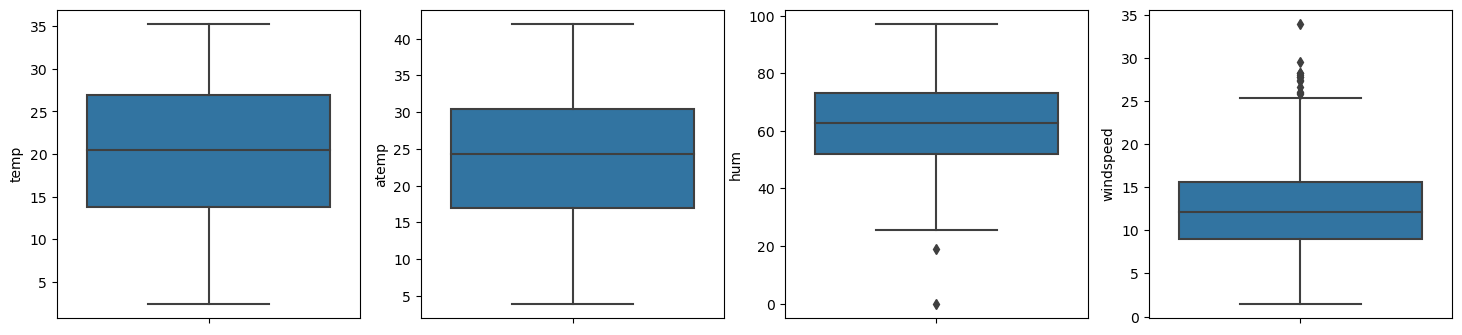

In [15]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_df)
    i+=1

From the above plots it is clear that we don't have many outliers

## Step 3: EDA

### Drawing pairplots of numerical variables to check for linear relationship

<Figure size 3000x2000 with 0 Axes>

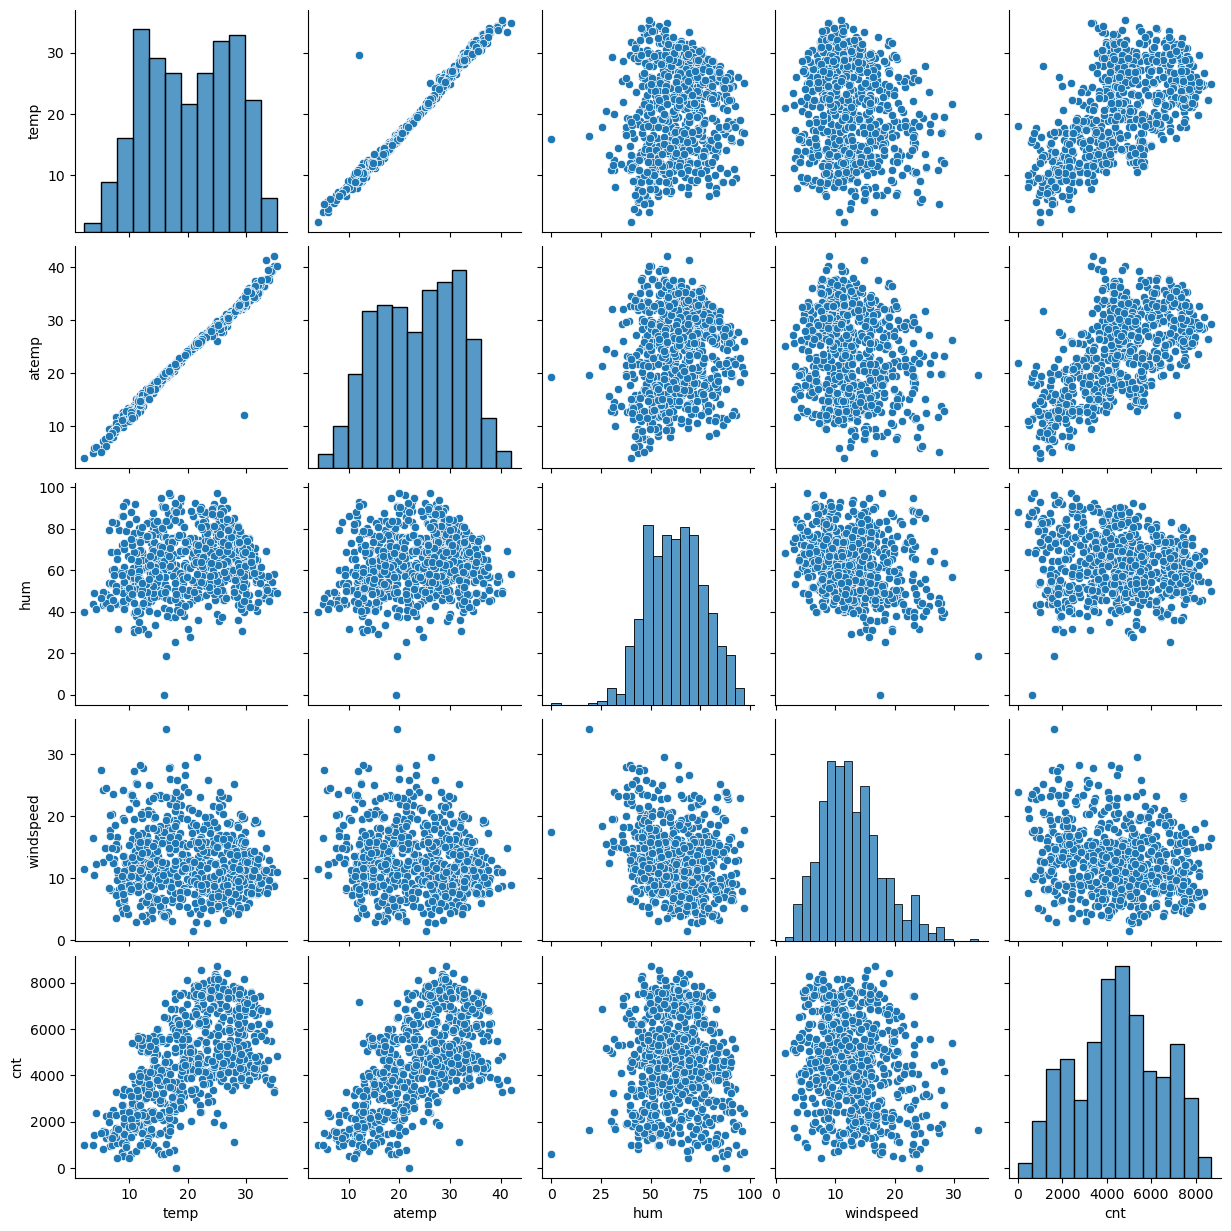

In [16]:
plt.figure(figsize=(30,20))
sns.pairplot(bike_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

There seems to be a linear relationship between cnt and temp , cnt and atemp

### Heatmap for correlation between numeric variables

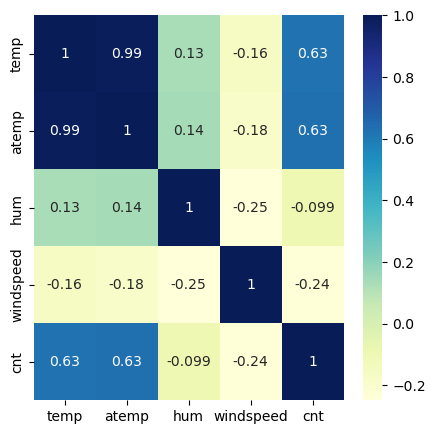

In [17]:
plt.figure(figsize=(5,5))
sns.heatmap(bike_df[['temp', 'atemp', 'hum', 'windspeed','cnt']].corr(),cmap="YlGnBu",annot=True)
plt.show()

In [18]:
# High correlation between cnt and atemp , cnt and temp , very high correlation between atemp and temp
# We will drop either temp or atemp

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

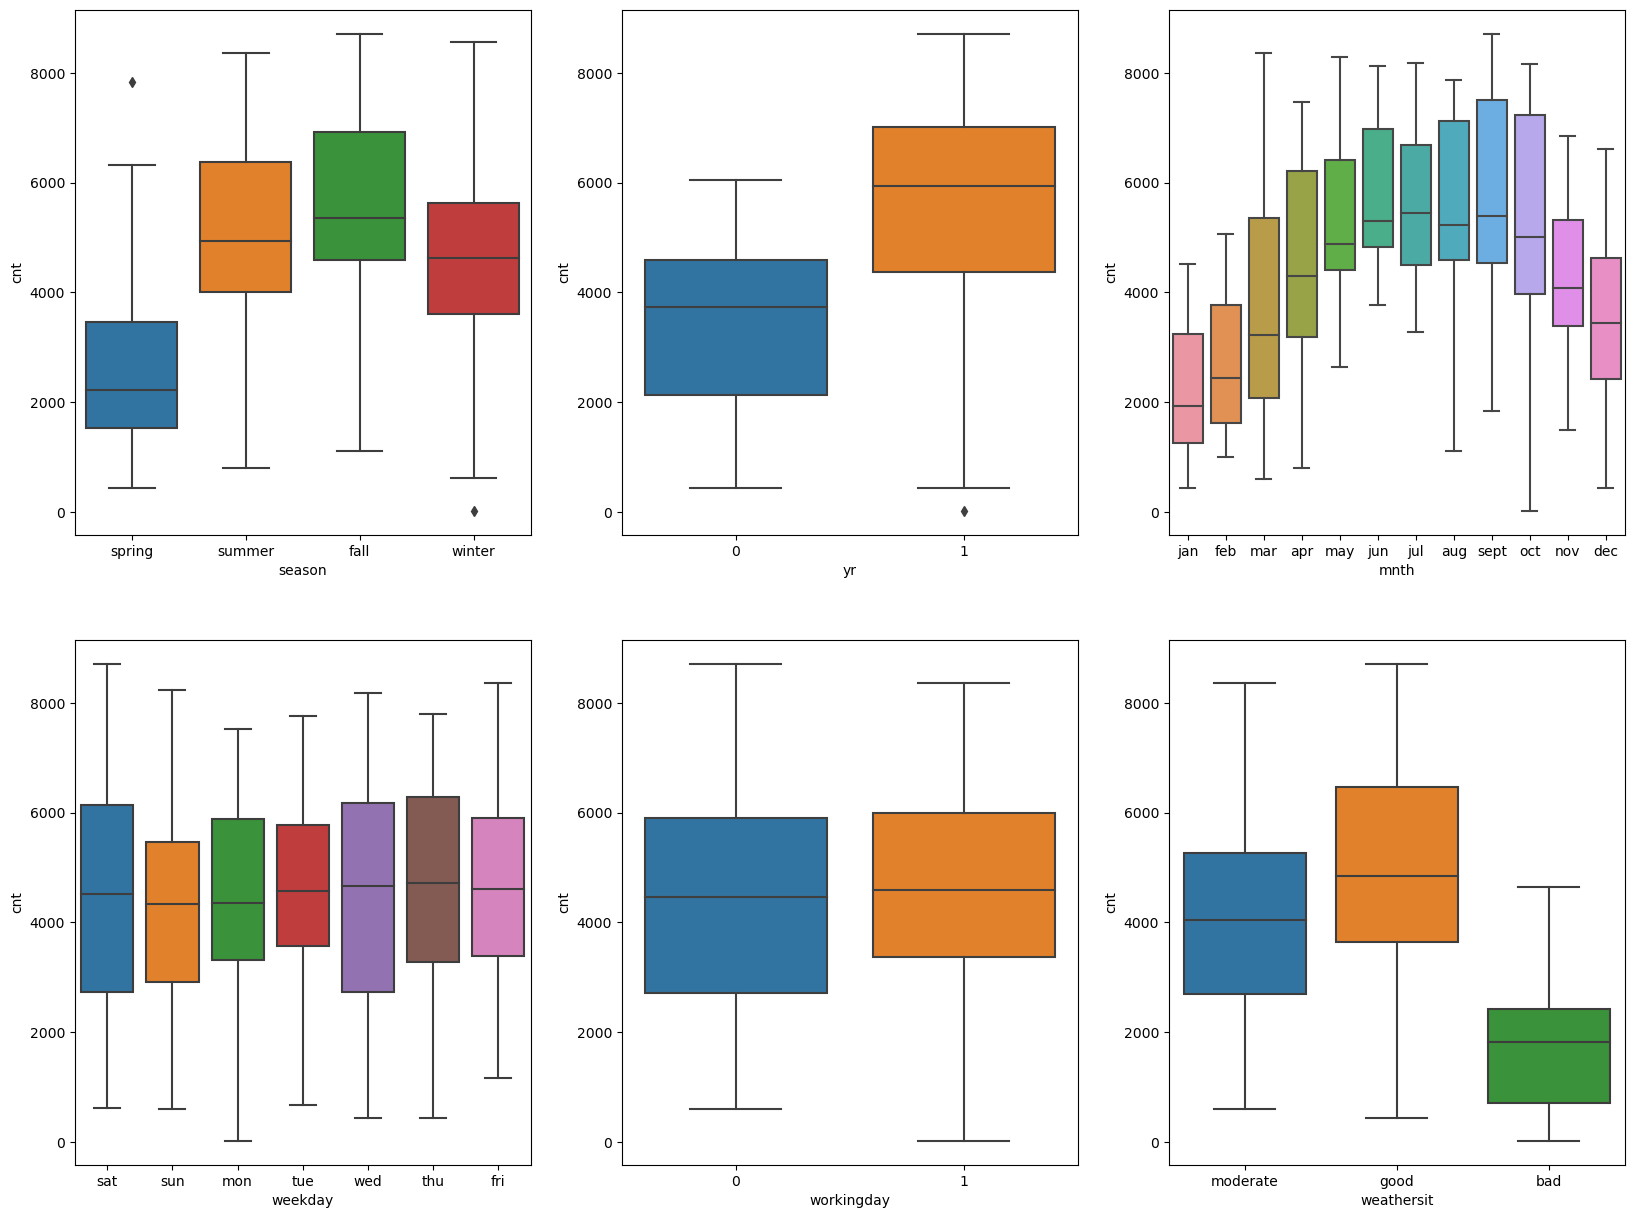

In [19]:
#visualising the categorical variables

plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bike_df)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=bike_df)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike_df)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=bike_df)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=bike_df)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike_df)

Observations :
- SEASON AND CNT : Cnt is highest in fall and lowest in spring
- YEAR AND CNT : Cnt is more in 2019 than in 2018
- MONTH AND CNT : Cnt is highest in sept, oct and lowest in jan, feb , march 
- WEEKDAYS AND CNT : No pattern 
- WORKINGDAY AND CNT : More variation on non working day but the median is almost same
- WEATHERSIT AND CNT : CNT high on good weathersit and low on bad weathersit

## Step 4: Data preparation for linear regression

### (i) Creating dummy variables for categorical variables

In [20]:
# Removing atemp from bike_df because the correlation with temp is very high
bike_df.drop(['atemp'],axis=1,inplace=True)

In [21]:
bike_df = pd.get_dummies(data=bike_df,columns=["season","mnth","weekday"],drop_first=True)
bike_df = pd.get_dummies(data=bike_df,columns=["weathersit"],drop_first=True)

In [22]:
bike_df.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [23]:
bike_df.head()

,yr,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


### (ii) Splitting data into train and test data

In [24]:
bike_df.shape

(730, 28)

In [25]:
#y to contain only target variable
y=bike_df.pop('cnt')

#X is all remaining variable also our independent variables
X=bike_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
X.head()

,yr,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,14.110847,80.5833,10.749882,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,1,8.200000,59.0435,10.739832,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,1,9.305237,43.6957,12.522300,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


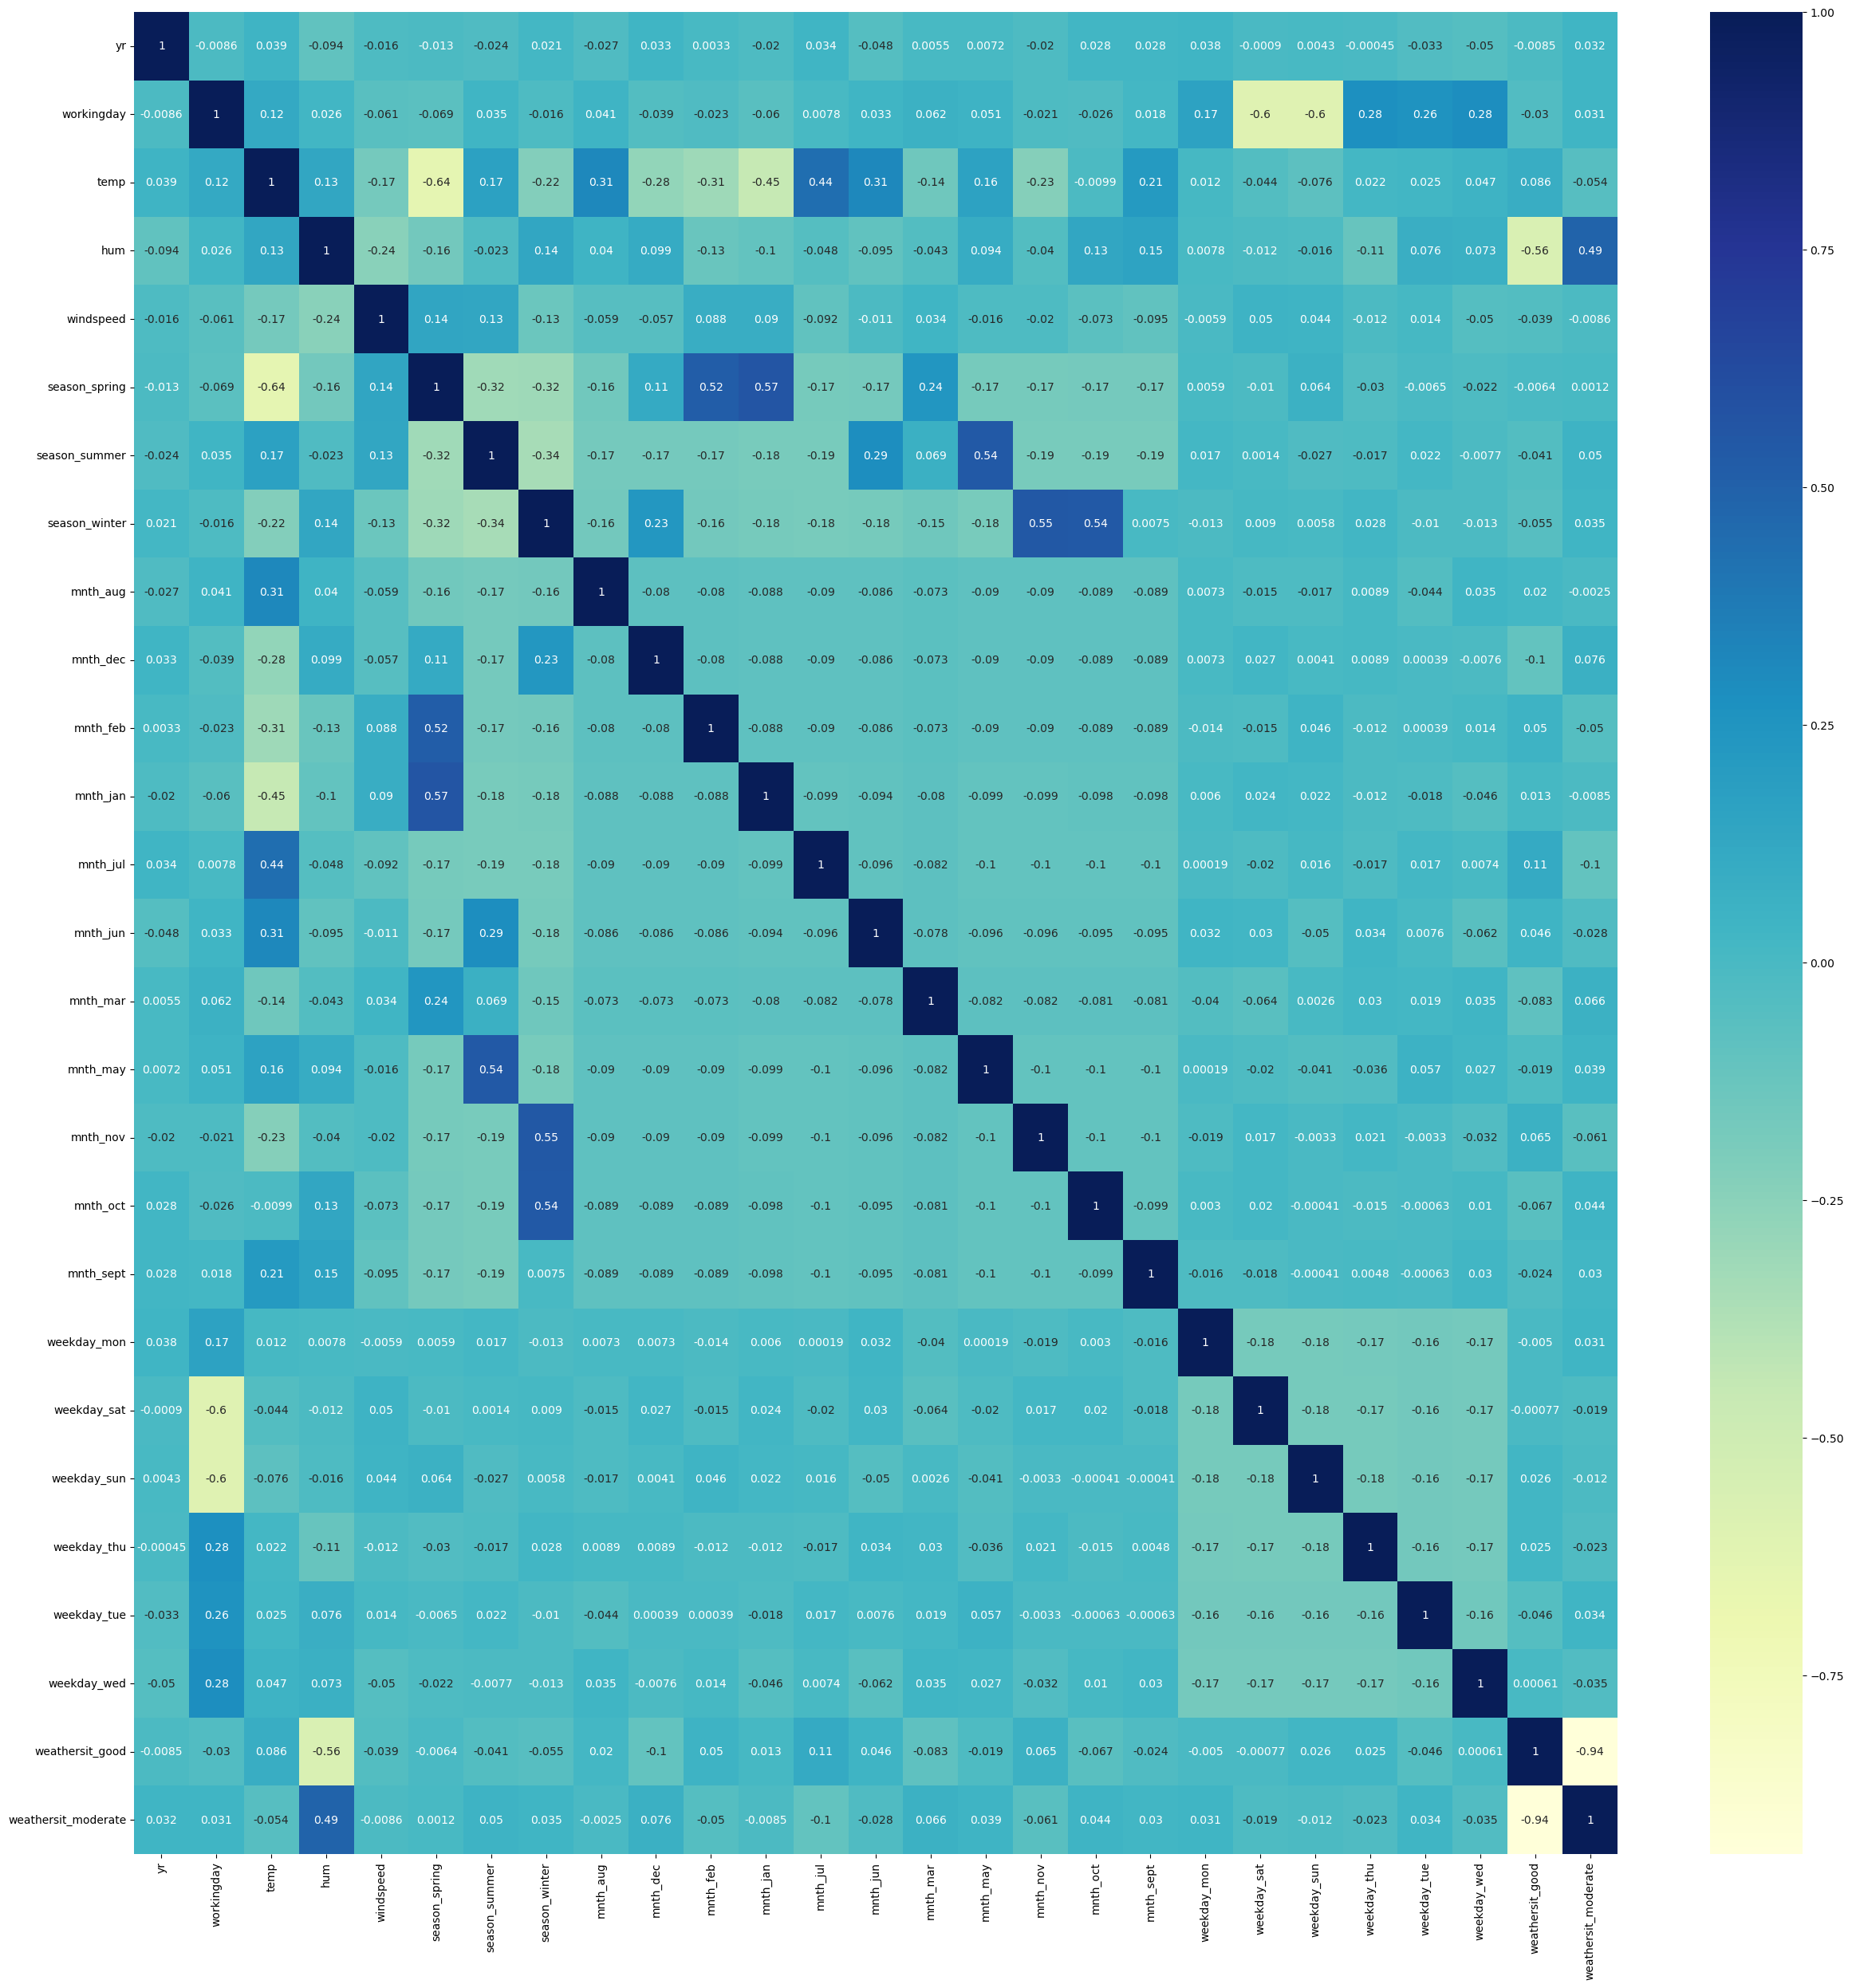

In [27]:
plt.figure(figsize=(30,30))
sns.heatmap(X_train.corr(),cmap="YlGnBu",annot=True)
plt.show()
#Plotting heatmap to understand correlation between all variables

In [28]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 27)
(219, 27)


### (iii) Scaling

In [29]:
# Let us scale continuous variables
num_vars = ['temp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [30]:
X_train.describe()

,yr,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.669276,0.550874,0.654174,0.414873,0.230920,0.258317,0.250489,0.074364,0.074364,...,0.09002,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.624266,0.346380
std,0.500067,0.470935,0.227231,0.143648,0.185619,0.421834,0.438138,0.433719,0.262619,0.262619,...,0.28649,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354221,0.544598,0.281934,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.575304,0.659940,0.384732,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.745079,0.756977,0.526481,0.000000,1.000000,0.500000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
X_train.head()

,yr,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
683,1,1,0.327133,0.639330,0.327101,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
645,1,0,0.403972,0.731215,0.419004,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
163,0,1,0.717562,0.509660,0.708724,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
360,0,1,0.331287,0.785745,0.415925,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
640,1,1,0.745598,0.817947,0.110593,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


## Step 5: Build model using RFE

In [32]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
#Cut down number of features to 20 using automated approach
#rfe = RFE(lr,15)
rfe = RFE(estimator=LinearRegression(), n_features_to_select=20)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [34]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', False, 8),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 7),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 3),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 6),
 ('weekday_tue', True, 1),
 ('weekday_wed', False, 5),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [35]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [36]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [37]:
#Print Columns selected by RFE. We will manually eliminate for these columns
X_train.columns[rfe.support_]

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_sat',
       'weekday_sun', 'weekday_tue', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [38]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_feb', 'mnth_jan', 'mnth_jun', 'weekday_mon',
       'weekday_thu', 'weekday_wed'],
      dtype='object')

In [39]:
# Taking 20 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_sat',
       'weekday_sun', 'weekday_tue', 'weathersit_good', 'weathersit_moderate']]

In [40]:
X_train_rfe.shape

(511, 20)

## Model-1

In [41]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_sat',
       'weekday_sun', 'weekday_tue', 'weathersit_good', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.5
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          4.89e-185
Time:                        08:06:52   Log-Likelihood:                -4113.2
No. Observations:                 511   AIC:                             8268.
Df Residuals:                     490   BIC:                             8357.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 509.8657    

## Model-2

In [42]:
#Dropping variable weekday_sun as it has high p-value and high VIF
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_sat',
       'weekday_tue', 'weathersit_good', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     142.1
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.33e-185
Time:                        08:06:52   Log-Likelihood:                -4114.4
No. Observations:                 511   AIC:                             8269.
Df Residuals:                     491   BIC:                             8354.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 812.8266    

### Model-3

In [43]:
#Dropping variable season_summer as it has high p-value
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_sat',
       'weekday_tue', 'weathersit_good', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     149.9
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.95e-186
Time:                        08:06:52   Log-Likelihood:                -4115.0
No. Observations:                 511   AIC:                             8268.
Df Residuals:                     492   BIC:                             8349.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 989.0824    

## Model-4

In [44]:
#Dropping variable mnth_oct as it has high p-value
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_sept', 'weekday_sat',
       'weekday_tue', 'weathersit_good', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.5
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          3.01e-187
Time:                        08:06:52   Log-Likelihood:                -4115.7
No. Observations:                 511   AIC:                             8267.
Df Residuals:                     493   BIC:                             8344.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 976.0903    

## Model-5

In [45]:
#Dropping variable weekday_tue as it has high p-value
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_sept', 'weekday_sat',
       'weathersit_good', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          6.76e-188
Time:                        08:06:52   Log-Likelihood:                -4116.9
No. Observations:                 511   AIC:                             8268.
Df Residuals:                     494   BIC:                             8340.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1000.1194    

## Model-6

In [46]:
#Dropping variable hum as it has high VIF
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_sept', 'weekday_sat',
       'weathersit_good', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     172.3
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          2.18e-185
Time:                        08:06:52   Log-Likelihood:                -4125.6
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     495   BIC:                             8351.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -196.3737    

## Model-7

In [47]:
#Dropping variable mnth_may as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_nov', 'mnth_sept', 'weekday_sat',
       'weathersit_good', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.6
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          7.33e-186
Time:                        08:06:52   Log-Likelihood:                -4127.2
No. Observations:                 511   AIC:                             8284.
Df Residuals:                     496   BIC:                             8348.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -135.2809    

## Model-8

In [48]:
#Dropping variable weathersit_good as it has high VIF
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_nov', 'mnth_sept', 'weekday_sat',
       'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     153.7
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.25e-164
Time:                        08:06:52   Log-Likelihood:                -4180.4
No. Observations:                 511   AIC:                             8389.
Df Residuals:                     497   BIC:                             8448.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2085.3369    

In [49]:
#Temp still has high VIF , as it has a good linear relationship with target variable cnt, checking heatmap to see if 
#removing some other varibale can improve the VIF for temp

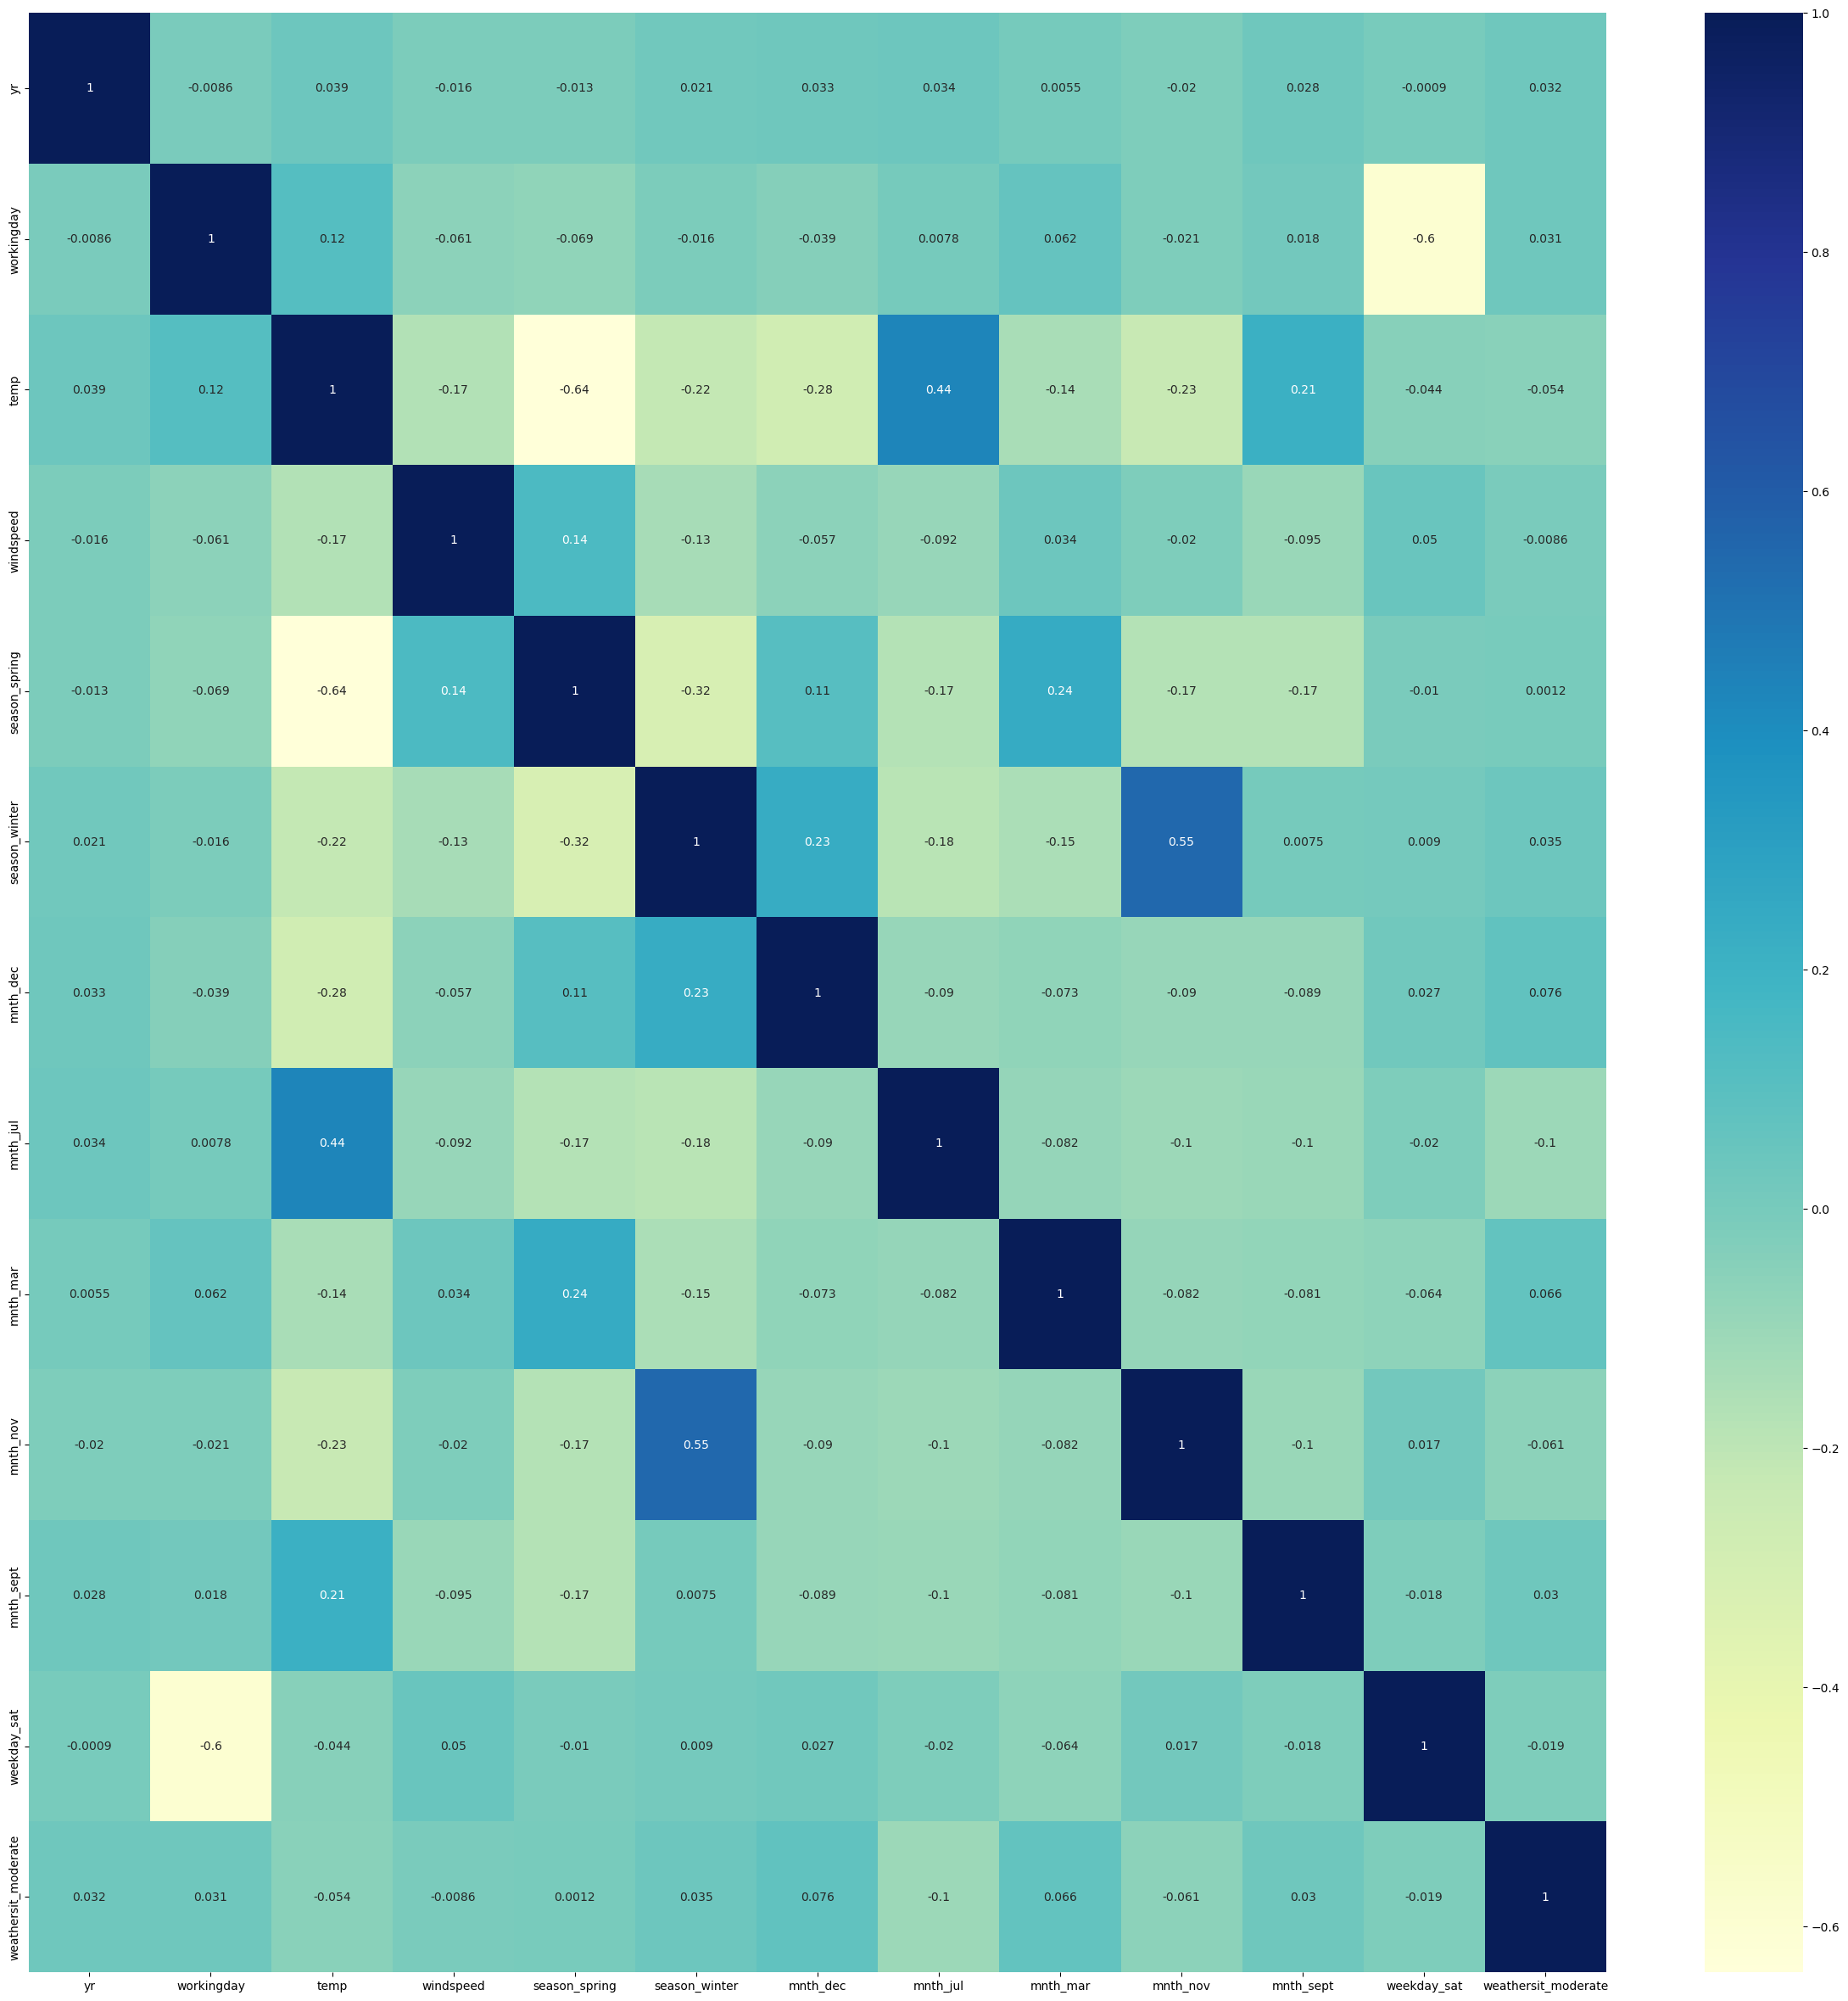

In [50]:
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_nov', 'mnth_sept', 'weekday_sat',
       'weathersit_moderate']


plt.figure(figsize=(30,30))
sns.heatmap(X_train[cols].corr(),cmap="YlGnBu",annot=True)
plt.show()
#Plotting heatmap to understand correlation between all variables

## Model-9

In [51]:
#Dropping variable season_spring to see if it improves VIF for temp
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar',
       'mnth_nov', 'mnth_sept', 'weekday_sat',
       'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     142.9
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.32e-152
Time:                        08:06:53   Log-Likelihood:                -4211.7
No. Observations:                 511   AIC:                             8449.
Df Residuals:                     498   BIC:                             8504.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 578.5945    

## Model-10

In [52]:
#Dropping variable mnth_mar as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_winter', 'mnth_dec', 'mnth_jul',
       'mnth_nov', 'mnth_sept', 'weekday_sat',
       'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     155.6
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.99e-153
Time:                        08:06:53   Log-Likelihood:                -4212.3
No. Observations:                 511   AIC:                             8449.
Df Residuals:                     499   BIC:                             8500.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 621.1612    

## Model-11

In [53]:
#Dropping variable mnth_nov as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_winter', 'mnth_dec', 'mnth_jul',
       'mnth_sept', 'weekday_sat',
       'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     170.1
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          7.75e-154
Time:                        08:06:53   Log-Likelihood:                -4214.0
No. Observations:                 511   AIC:                             8450.
Df Residuals:                     500   BIC:                             8497.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 569.5969    

## Model-12

In [56]:
#Dropping variable mnth_jul as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_winter', 'mnth_dec',
       'mnth_sept', 'weekday_sat',
       'weathersit_moderate']

lr = build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     181.9
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.23e-151
Time:                        08:07:06   Log-Likelihood:                -4221.9
No. Observations:                 511   AIC:                             8464.
Df Residuals:                     501   BIC:                             8506.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 654.7270    

#### VIF is below 5 for all variables and approximately 5 for temp. p-value for all the features is below 0.05 and R2 is 0.76, prob(F-statistic) is very low
#### We finalize this model to use further

### Residual Analysis

In [57]:
X_train_sm = sm.add_constant(X_train[cols])
y_train_pred = lr.predict(X_train_sm)

In [58]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

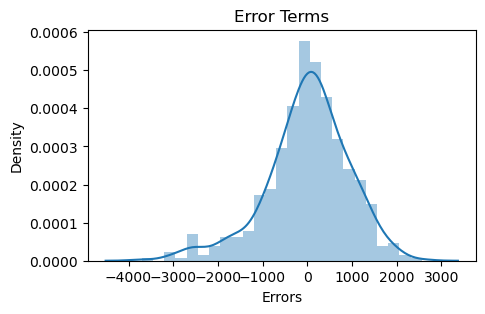

In [59]:
plt.figure(figsize=(5,3))
plot_res_dist(y_train, y_train_pred)

### Error terms are normally distributed

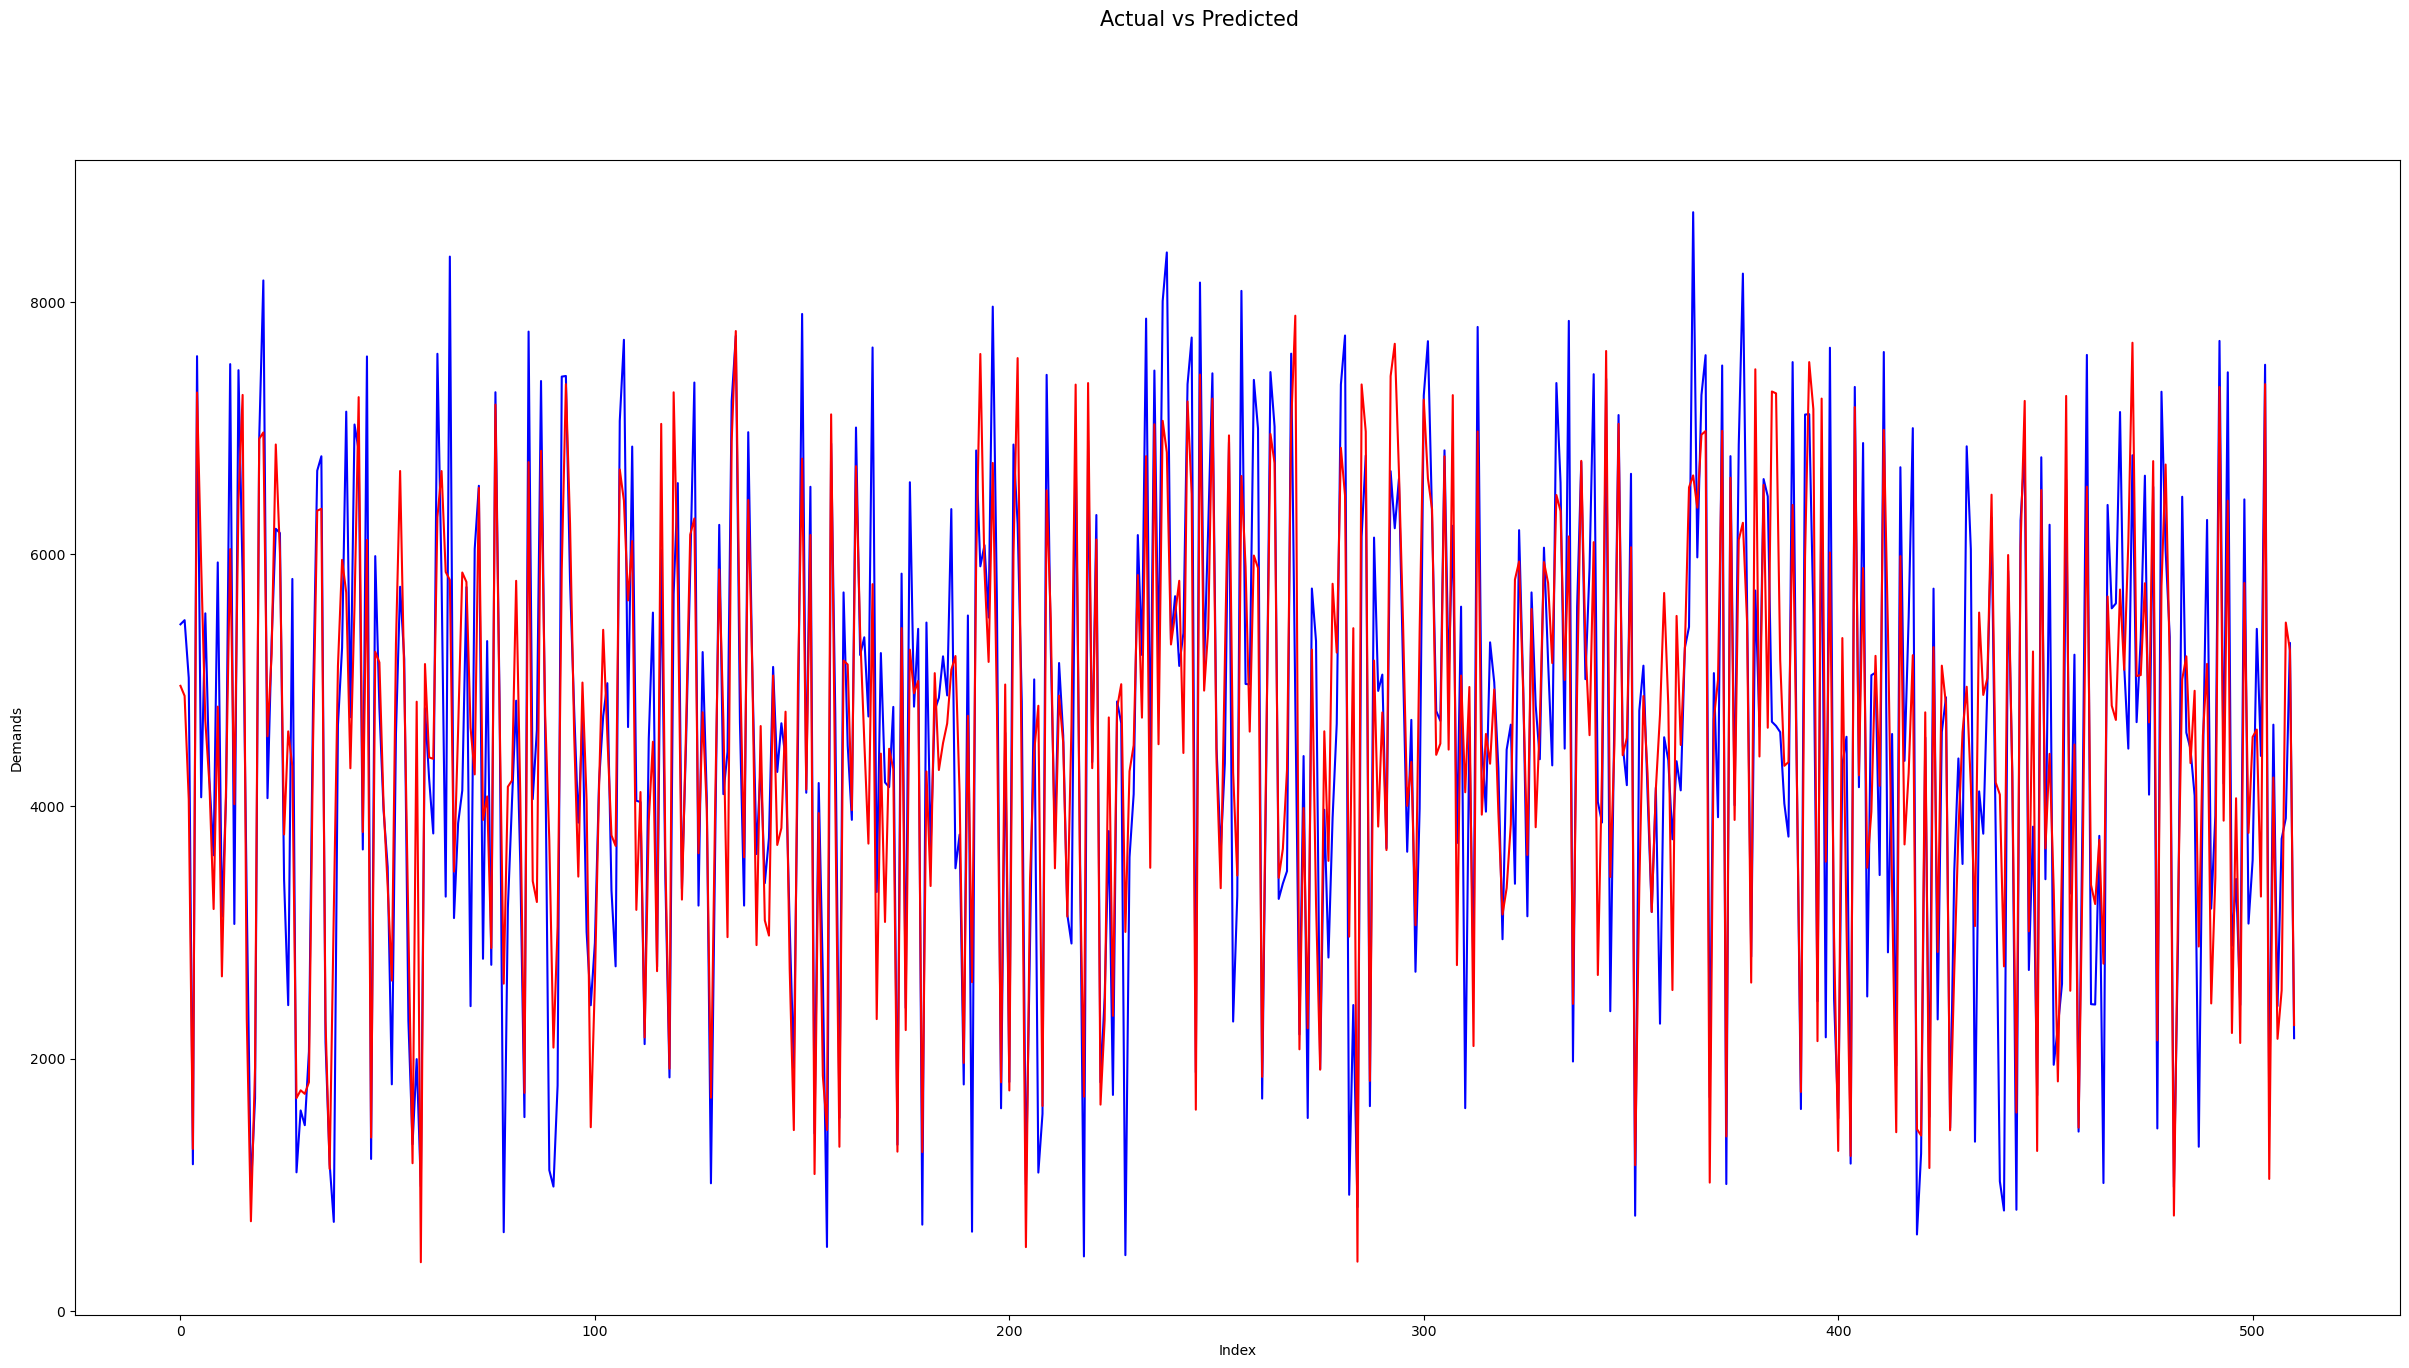

In [60]:
# Actual vs Predicted
plt.figure(figsize=(30,15))
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

## Model Predictions

## R-Squared value for train predictions

In [61]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7656497968252016

### Prediction of values on test dataset

In [62]:
#Scale variables in X_test
num_vars = ['temp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [64]:
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_winter', 'mnth_dec',
       'mnth_sept', 'weekday_sat',
       'weathersit_moderate']


X_test_sm = sm.add_constant(X_test[cols])

#Predicting test data values
y_pred = lr.predict(X_test_sm)

## R-Squared value for test predictions

In [65]:
# Find out the R squared value between test and predicted test data sets.  
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7506605951853953

## Evaluating the model

### Conclusion
Significant variables to predict the demand for shared bikes

- temp
- yr
- season_winter
- mnth_sept
- weekday_sat
- workingday
- weathersit_moderate
- mnth_dec
- windspeed